# Objective: Predict the price of a phone based on phone specification features.

In [3]:
# libraries import
# from google.colab import files  # uncomment this line if working with google colab
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # for splitting the data
from sklearn.preprocessing import StandardScaler  # preprosessor that eliminates data bias
from sklearn.neighbors import KNeighborsClassifier  # The main classification algorithm
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report  # Reporting

# Used for interactive plotting
%matplotlib notebook  

In [4]:

# Data upload and information gathering


In [5]:
# Uploading dataset
# data = files.upload()

In [6]:
dataset = pd.read_csv("phones.csv")


In [7]:
len(dataset)

2000

In [8]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [10]:
# Create a dataframe using pandas
df = pd.DataFrame(dataset)

In [11]:
# print rows columns 
df.shape

(2000, 21)

In [12]:
# Get general dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
# Observe Data Correlation between columns

In [14]:
dataset[["battery_power", "blue", "clock_speed", "dual_sim", "fc", "four_g", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width" ,"ram" ,"sc_h" ,"sc_w", "talk_time" ,"three_g" ,"touch_screen" ,"wifi"]].corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


**Data Cleaning**

In [15]:
df = df.drop(["blue", "wifi","dual_sim","fc", "four_g","m_dep", "touch_screen", "talk_time", "mobile_wt", "three_g", "px_height", "px_width"], axis=1)

In [16]:
df

,battery_power,clock_speed,int_memory,n_cores,pc,ram,sc_h,sc_w,price_range
0,842,2.2,7,2,2,2549,9,7,1
1,1021,0.5,53,3,6,2631,17,3,2
2,563,0.5,41,5,6,2603,11,2,2
3,615,2.5,10,6,9,2769,16,8,2
4,1821,1.2,44,2,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,6,14,668,13,4,0
1996,1965,2.6,39,4,3,2032,11,10,2
1997,1911,0.9,36,8,3,3057,9,1,3
1998,1512,0.9,46,5,5,869,18,10,0


In [17]:
# Randomly Checking any column, i.e clock_speed for existence of zero values
df["clock_speed"]

0       2.2
1       0.5
2       0.5
3       2.5
4       1.2
       ... 
1995    0.5
1996    2.6
1997    0.9
1998    0.9
1999    2.0
Name: clock_speed, Length: 2000, dtype: float64

In [18]:
# Replace existing zeros with mean values
for col in df:
  df[col] = df[col].replace(0, np.NaN)
  mean = int(df[col].mean(skipna=True))
  df[col] = df[col].replace(np.NaN, mean)


In [19]:
# df["clock_speed"]
df

,battery_power,clock_speed,int_memory,n_cores,pc,ram,sc_h,sc_w,price_range
0,842,2.2,7,2,2.0,2549,9,7.0,1.0
1,1021,0.5,53,3,6.0,2631,17,3.0,2.0
2,563,0.5,41,5,6.0,2603,11,2.0,2.0
3,615,2.5,10,6,9.0,2769,16,8.0,2.0
4,1821,1.2,44,2,14.0,1411,8,2.0,1.0
...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,6,14.0,668,13,4.0,2.0
1996,1965,2.6,39,4,3.0,2032,11,10.0,2.0
1997,1911,0.9,36,8,3.0,3057,9,1.0,3.0
1998,1512,0.9,46,5,5.0,869,18,10.0,2.0


**Data Visualization**

In [20]:
#df.info()

<IPython.core.display.Javascript object>


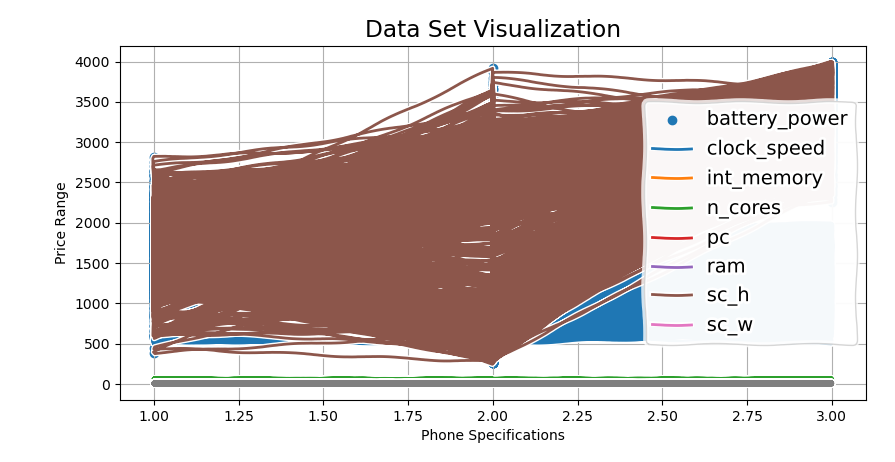

In [21]:
# Scatter Plot
features = ['battery_power','clock_speed','int_memory','n_cores','pc','ram','sc_h','sc_w']
plt.scatter(x= df["price_range"], y = features[5], data=df)


**Model Training & Prediction**

In [22]:
# Split data into training and testing
X = df.iloc[:, 0:8]  # Copy all columns upto but not including the target column
y = df.iloc[:, 8]  # Focus is on the target column alone
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [23]:
print(plt.style.available)
# plt.style.use('ggplot')
plt.xkcd()

features = ['battery_power','clock_speed','int_memory','n_cores','pc','ram','sc_h','sc_w']

plt.plot(y, X)
plt.title("Data Set Visualization")
plt.xlabel("Phone Specifications")
plt.ylabel("Price Range")
plt.tight_layout()
plt.legend(features)
plt.grid(True)
plt.savefig('datapng.png')
plt.show()


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.


In [24]:
X

,battery_power,clock_speed,int_memory,n_cores,pc,ram,sc_h,sc_w
0,842,2.2,7,2,2.0,2549,9,7.0
1,1021,0.5,53,3,6.0,2631,17,3.0
2,563,0.5,41,5,6.0,2603,11,2.0
3,615,2.5,10,6,9.0,2769,16,8.0
4,1821,1.2,44,2,14.0,1411,8,2.0
...,...,...,...,...,...,...,...,...
1995,794,0.5,2,6,14.0,668,13,4.0
1996,1965,2.6,39,4,3.0,2032,11,10.0
1997,1911,0.9,36,8,3.0,3057,9,1.0
1998,1512,0.9,46,5,5.0,869,18,10.0


In [25]:
y

0       1.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
1995    2.0
1996    2.0
1997    3.0
1998    2.0
1999    3.0
Name: price_range, Length: 2000, dtype: float64

In [26]:
# Feature Scaling
# Nb: For any algo that computes distance or assumes normality, scale your features
# We usually don't train the y_train & y_test, only the data going in i.e the X(s)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [27]:
# Define the Model: K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') # we are using eucladian to measure the distance
# n_neigbors is the squareroot of len(y)
# K=11


In [28]:
# Model Fitting
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [29]:
# Predict the test set results
y_pred = classifier.predict(X_test)

In [30]:
# Model Evaluation Using Confusion matrix
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [31]:
confusion_mtrx

array([[ 36,  56,   0],
       [ 44, 133,  17],
       [  0,  24,  90]])

In [32]:
# f1_score(y_test, y_pred)
# We already have this catered for in the conclusive report below

In [33]:
# Determining the accuracy 
print(accuracy_score(y_test, y_pred))

0.6475


In [34]:
print("Classification Report with Value of K=11 \n")
print(classification_report(y_test, y_pred))

Classification Report with Value of K=11 

              precision    recall  f1-score   support

         1.0       0.45      0.39      0.42        92
         2.0       0.62      0.69      0.65       194
         3.0       0.84      0.79      0.81       114

    accuracy                           0.65       400
   macro avg       0.64      0.62      0.63       400
weighted avg       0.65      0.65      0.65       400



**Plot With Different Values of K in Range 1- 100**

<IPython.core.display.Javascript object>


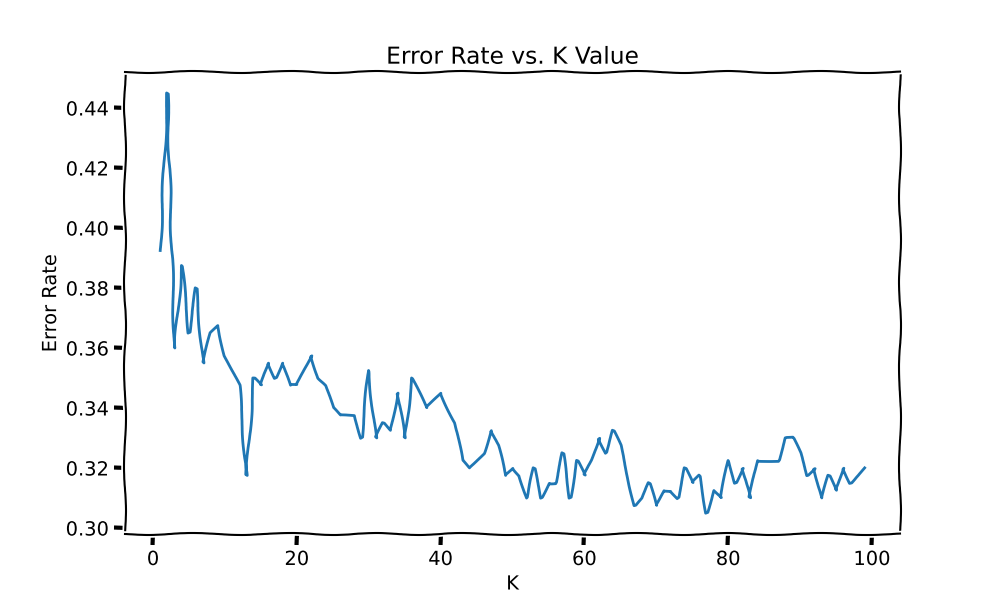

In [35]:
error_rate = []

for i in range(1, 100):
  classifier = KNeighborsClassifier(n_neighbors=i, p=2, metric='euclidean')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  error_rate.append(np.mean(y_pred != y_test))

# plot the graph that will show the best value of K
plt.figure(figsize=(10,6))
# plt.plot(range(1,100), error_rate, color = 'red', linestyle = 'dashed',
#          marker = 'o', markerfacecolor = 'green', markersize = 10)
plt.plot(range(1, 100), error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
